# Product Amount Forecast by Time

## Data

Info about this data set: https://fred.stlouisfed.org/series/IPN31152N


Units:  Index 2012=100, Not Seasonally Adjusted

Frequency:  Monthly

The industrial production (IP) index measures the real output of all relevant establishments located in the United States, regardless of their ownership, but not those located in U.S. territories.

NAICS = 31152

Source Code: IP.N31152.N

Suggested Citation:
Board of Governors of the Federal Reserve System (US), Industrial Production: Nondurable Goods: Ice cream and frozen dessert [IPN31152N], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/IPN31152N, November 16, 2019.

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Indest Data

In [2]:
df = pd.read_csv("Frozen_Dessert_Production.csv")

## Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Change the column name as "Production"
2. Plot your data and see its seasonalty

In [3]:
df

,DATE,IPN31152N
0,1972-01-01,59.962
1,1972-02-01,67.061
2,1972-03-01,74.235
3,1972-04-01,78.112
4,1972-05-01,84.764
...,...,...
568,2019-05-01,114.561
569,2019-06-01,124.960
570,2019-07-01,110.263
571,2019-08-01,102.609


In [4]:
df["DATE"] = pd.to_datetime(df["DATE"])

In [5]:
df = df.set_index(df["DATE"], drop=True)

In [6]:
df = df.drop("DATE", axis=1)

In [7]:
df.rename({"IPN31152N":"Production"}, axis=1, inplace=True)

<AxesSubplot:xlabel='DATE'>

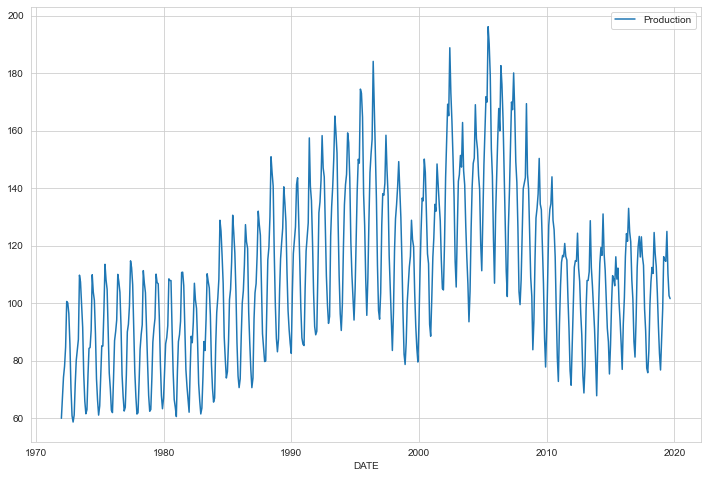

In [8]:
plt.figure(figsize=(12,8))

sns.lineplot(data=df)

## Preprocessing of Data

### Train Test Split

In [9]:
len(df)

573

In [10]:
len(df) - 24

549

In [11]:
test_size = 24

In [12]:
test_ind = len(df)- test_size

In [13]:
train = df[:test_ind]
test = df[test_ind:]

In [14]:
train

,Production
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
2017-05-01,116.064
2017-06-01,123.087
2017-07-01,116.264


In [15]:
test

,Production
DATE,
2017-10-01,90.473
2017-11-01,77.438
2017-12-01,75.812
2018-01-01,83.434
2018-02-01,99.490
2018-03-01,107.315
2018-04-01,112.431
2018-05-01,110.354
2018-06-01,124.584


### Scaling

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()

In [18]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

## Time Series Generator

In [19]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [20]:
length = 12
generator = TimeseriesGenerator(train_scaled, train_scaled, length = length, batch_size = 1)

In [21]:
generator[0]

(array([[[0.00947104],
         [0.06108982],
         [0.11326273],
         [0.14145625],
         [0.18982663],
         [0.30495972],
         [0.30154406],
         [0.27416065],
         [0.19736841],
         [0.08532665],
         [0.01561588],
         [0.        ]]]),
 array([[0.01774221]]))

## Modelling & Model Performance

### Import related libraries

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping

### Creating Model

### with "tanh" activation function

In [72]:
model = Sequential()
model.add(LSTM(100, activation = 'tanh', input_shape = (length, 1)))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

In [73]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [74]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5)

In [75]:
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length = length, batch_size = 1)

In [76]:
model.fit_generator(generator, epochs = 20,
                    validation_data = validation_generator,
                    callbacks = [early_stop])

Epoch 1/20
537/537 [==============================] - 3s 3ms/step - loss: 0.0193 - val_loss: 0.0017
Epoch 2/20
537/537 [==============================] - 1s 2ms/step - loss: 0.0043 - val_loss: 0.0019
Epoch 3/20
537/537 [==============================] - 1s 2ms/step - loss: 0.0037 - val_loss: 0.0020
Epoch 4/20
537/537 [==============================] - 1s 2ms/step - loss: 0.0039 - val_loss: 0.0018
Epoch 5/20
537/537 [==============================] - 1s 2ms/step - loss: 0.0036 - val_loss: 0.0033
Epoch 6/20
537/537 [==============================] - 1s 2ms/step - loss: 0.0032 - val_loss: 0.0023


<AxesSubplot:>

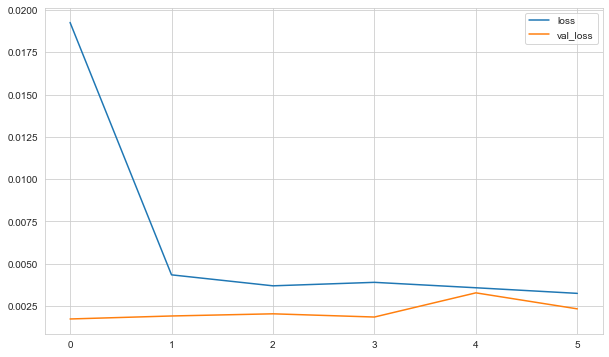

In [77]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

#### Evaluate on Test Data

In [78]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [79]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

In [80]:
test_predictions = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, 1))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

#### Inverse Transformations and Comparing

In [81]:
true_predictions = scaler.inverse_transform(test_predictions)

In [82]:
test['Predictions_tanh'] = true_predictions

In [83]:
test

,Production,Predictions_tanh
DATE,,
2017-10-01,90.473,89.470
2017-11-01,77.438,83.792
2017-12-01,75.812,85.977
2018-01-01,83.434,93.942
2018-02-01,99.490,103.506
2018-03-01,107.315,112.267
2018-04-01,112.431,119.533
2018-05-01,110.354,124.253
2018-06-01,124.584,126.059


<AxesSubplot:xlabel='DATE'>

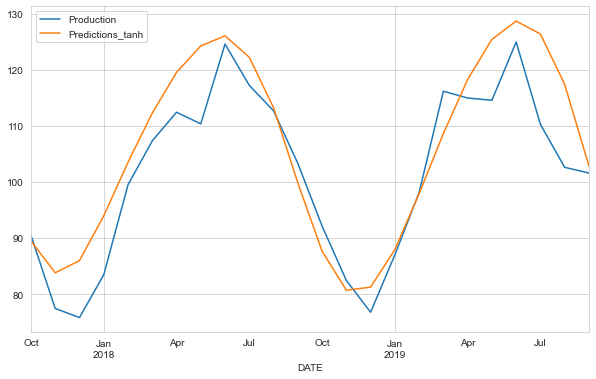

In [84]:
test.plot()

#### Calculation R2 Score and Error Metrics

In [85]:
eval_metrics(test_scaled, test_predictions)

r2_score: 0.7548020021064856 
 mae: 0.0417895948458192 
 mse: 0.0028697166398601293 
 rmse: 0.05356973623101134


### with "relu" activation function

In [130]:
model = Sequential()
model.add(LSTM(100, activation = 'relu', input_shape = (length, 1)))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

In [131]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5)

In [132]:
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length = length, batch_size = 1)

In [133]:
model.fit_generator(generator, epochs = 20,
                    validation_data = validation_generator,
                    callbacks = [early_stop])

Epoch 1/20
537/537 [==============================] - 2s 2ms/step - loss: 0.0193 - val_loss: 0.0124
Epoch 2/20
537/537 [==============================] - 1s 2ms/step - loss: 0.0058 - val_loss: 0.0020
Epoch 3/20
537/537 [==============================] - 1s 2ms/step - loss: 0.0049 - val_loss: 0.0027
Epoch 4/20
537/537 [==============================] - 1s 2ms/step - loss: 0.0049 - val_loss: 0.0023
Epoch 5/20
537/537 [==============================] - 1s 2ms/step - loss: 0.0041 - val_loss: 0.0017
Epoch 6/20
537/537 [==============================] - 1s 2ms/step - loss: 0.0039 - val_loss: 0.0016
Epoch 7/20
537/537 [==============================] - 1s 2ms/step - loss: 0.0035 - val_loss: 0.0018
Epoch 8/20
537/537 [==============================] - 1s 2ms/step - loss: 0.0033 - val_loss: 0.0016
Epoch 9/20
537/537 [==============================] - 1s 2ms/step - loss: 0.0033 - val_loss: 0.0016
Epoch 10/20
537/537 [==============================] - 1s 2ms/step - loss: 0.0031 - val_loss: 0.0016

<AxesSubplot:>

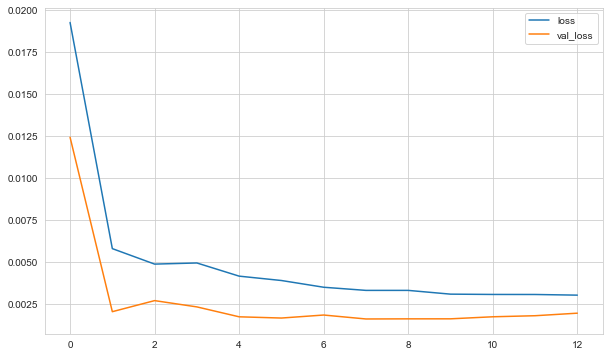

In [134]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

#### Evaluate on Test Data

In [135]:
test_predictions = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, 1))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

#### Inverse Transformations and Comparing

In [136]:
true_predictions = scaler.inverse_transform(test_predictions)

In [137]:
test['Predictions_relu'] = true_predictions

In [138]:
test

,Production,Predictions_tanh,Predictions_relu
DATE,,,
2017-10-01,90.473,89.470,91.930
2017-11-01,77.438,83.792,84.992
2017-12-01,75.812,85.977,84.466
2018-01-01,83.434,93.942,92.563
2018-02-01,99.490,103.506,103.787
2018-03-01,107.315,112.267,112.416
2018-04-01,112.431,119.533,118.648
2018-05-01,110.354,124.253,121.735
2018-06-01,124.584,126.059,123.687


<AxesSubplot:xlabel='DATE'>

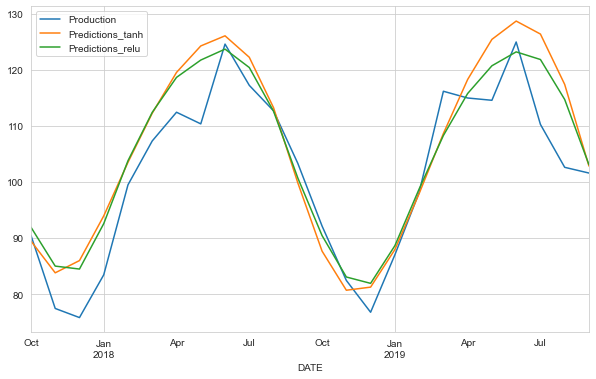

In [139]:
test.plot()

#### Calculation R2 Score and Error Metrics

In [140]:
eval_metrics(test_scaled, test_predictions)

r2_score: 0.8367566204833632 
 mae: 0.0339510886486104 
 mse: 0.0019105467686132607 
 rmse: 0.04370980174529805


## Retrain and Forecasting

Select activation function providing a better score, create your final model with full data, forecast for the next 12 months, and plot this forecast.

In [141]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [142]:
length = 12 
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, batch_size = 1)

In [143]:
model = Sequential()
model.add(LSTM(100, activation = 'relu', input_shape = (length, 1)))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

model.fit_generator(generator, epochs=15)

Epoch 1/15
561/561 [==============================] - 2s 2ms/step - loss: 0.0210
Epoch 2/15
561/561 [==============================] - 1s 2ms/step - loss: 0.0080
Epoch 3/15
561/561 [==============================] - 1s 2ms/step - loss: 0.0052
Epoch 4/15
561/561 [==============================] - 1s 2ms/step - loss: 0.0048
Epoch 5/15
561/561 [==============================] - 1s 2ms/step - loss: 0.0040
Epoch 6/15
561/561 [==============================] - 1s 2ms/step - loss: 0.0043
Epoch 7/15
561/561 [==============================] - 1s 2ms/step - loss: 0.0039
Epoch 8/15
561/561 [==============================] - 1s 2ms/step - loss: 0.0034
Epoch 9/15
561/561 [==============================] - 1s 2ms/step - loss: 0.0029
Epoch 10/15
561/561 [==============================] - 1s 2ms/step - loss: 0.0033
Epoch 11/15
561/561 [==============================] - 1s 2ms/step - loss: 0.0032
Epoch 12/15
561/561 [==============================] - 1s 2ms/step - loss: 0.0030
Epoch 13/15
561/561 [====

In [144]:
scaled_full_data.shape

(573, 1)

In [145]:
scaled_full_data[-length:].shape

(12, 1)

In [146]:
forecast = []
# Replace periods with whatever forecast length you want
periods = 12

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, 1))

for i in range(periods):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    forecast.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis = 1)

In [147]:
forecast = scaler.inverse_transform(forecast)

In [148]:
forecast

array([[ 91.40107577],
       [ 86.17627876],
       [ 85.7397759 ],
       [ 92.65689338],
       [104.57969172],
       [115.17936305],
       [122.48805037],
       [128.46476668],
       [130.90549428],
       [124.61518933],
       [115.16611756],
       [104.41736479]])

In [149]:
df.tail()

,Production
DATE,
2019-05-01,114.561
2019-06-01,124.960
2019-07-01,110.263
2019-08-01,102.609
2019-09-01,101.587


In [150]:
forecast_index = pd.date_range(start = '2019-10-01', periods = periods, freq = 'MS')

In [151]:
forecast_index

DatetimeIndex(['2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01',
               '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01',
               '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01'],
              dtype='datetime64[ns]', freq='MS')

In [152]:
forecast_df = pd.DataFrame(data = forecast, index = forecast_index, columns = ['Forecast'])

In [153]:
forecast_df

,Forecast
2019-10-01,91.401
2019-11-01,86.176
2019-12-01,85.740
2020-01-01,92.657
2020-02-01,104.580
2020-03-01,115.179
2020-04-01,122.488
2020-05-01,128.465
2020-06-01,130.905
2020-07-01,124.615


<AxesSubplot:>

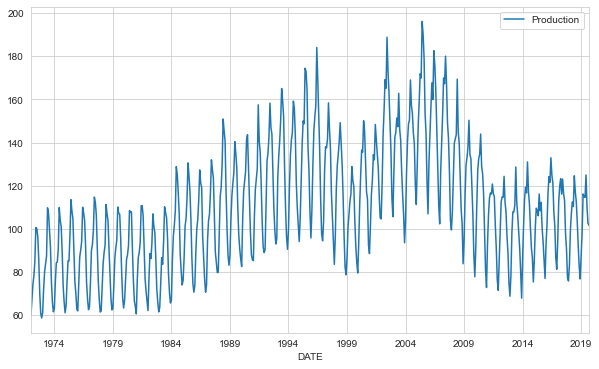

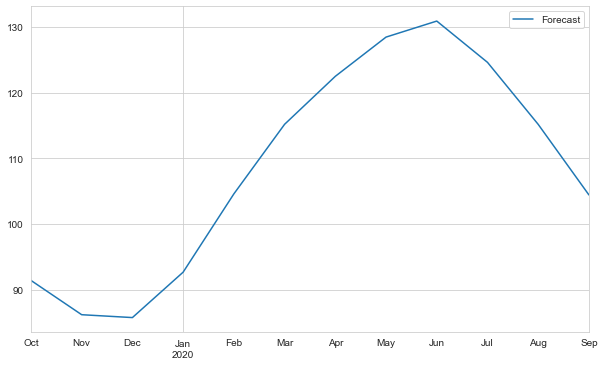

In [156]:
df.plot()
forecast_df.plot()

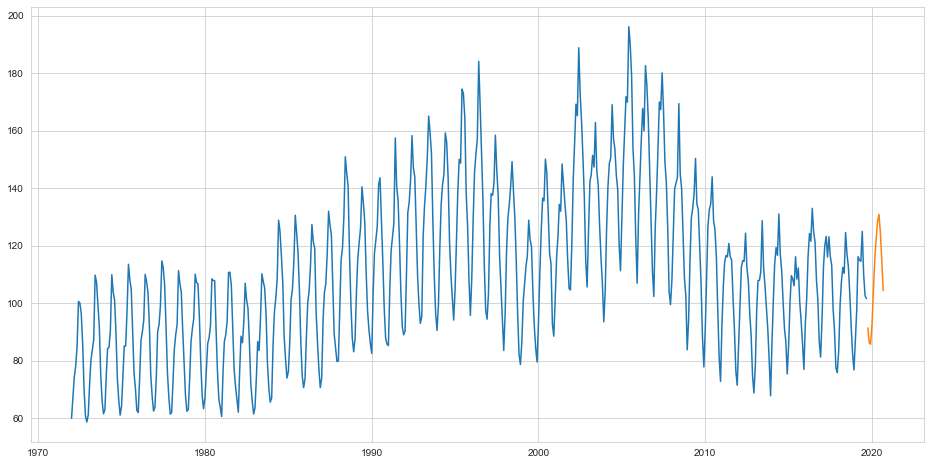

In [155]:
plt.figure(figsize = (16, 8))
plt.plot(df.index, df['Production'])
plt.plot(forecast_df.index, forecast_df['Forecast'])
#plt.plot(forecast_index, forecast)